<a href="https://colab.research.google.com/github/KyungdaePark/HongongMachine/blob/master/Principal_Component_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 데이터가 점점 많아지면.. 차원(용량) 을 줄여서 해결하자
# 주성분(데이터들의 분산 정도를 가장 잘 표현하는 벡터)는 데이터가 추가되면서 생성/변경된다.
# 이 주성분은 원본 샘플을 충분히 대변하므로, 이 주성분만을 이용해 훈련하는 것
# PCA 클래스
!wget https://bit.ly/fruits_300_data -O fruits_300_data.npy
import numpy as np
fruits = np.load('fruits_300_data.npy')
fruits_2d = fruits.reshape(-1,100*100)

--2022-02-20 08:30:16--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-02-20 08:30:16--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-02-20 08:30:16--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [ ]:
# PCA ㄱㄱ
from sklearn.decomposition import PCA
pca = PCA(n_components = 50) # n_components 는 주성분 개수
pca.fit(fruits_2d)

PCA(n_components=50)

In [ ]:
print(pca.components_.shape) # 50개의 주성분

(50, 10000)


In [ ]:
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio=1):
    n = len(arr)
    rows = int(np.ceil(n / 10))
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, figsize=(cols * ratio, rows * ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i * 10 + j < n:
                axs[i, j].imshow(arr[i * 10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

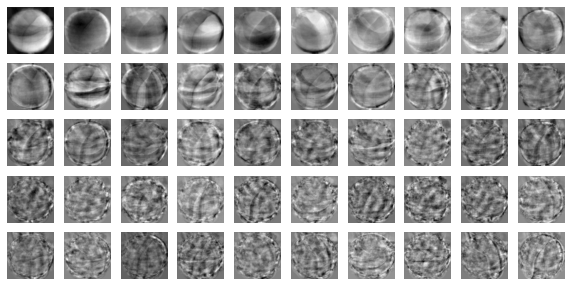

In [ ]:
draw_fruits(pca.components_.reshape(-1,100,100))

In [ ]:
# PCA의 TRANFORM을 이용해 원본 데이터의 차원을 50으로 줄여보자.

# 바꾸기 전 :
print(fruits_2d.shape)

fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 10000)
(300, 50)


In [ ]:
# 원상복귀 ? 가능
# inverse_transform()

fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


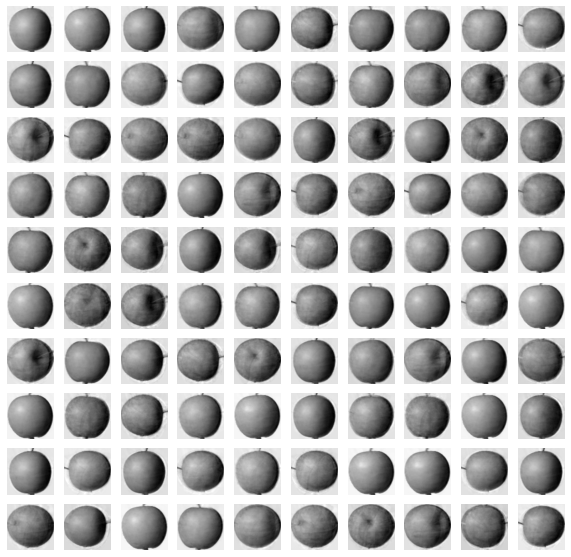

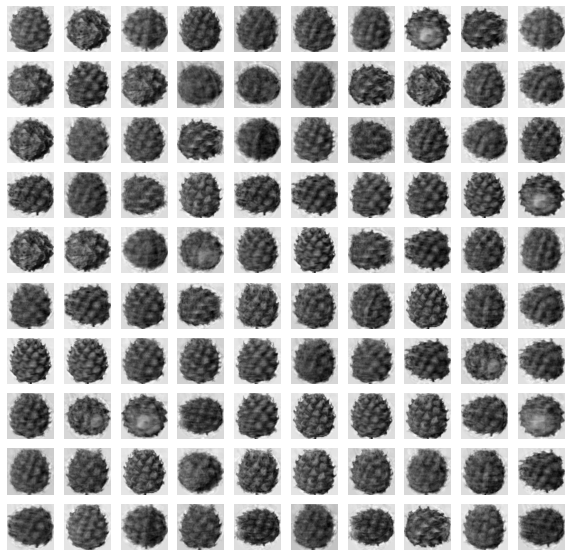

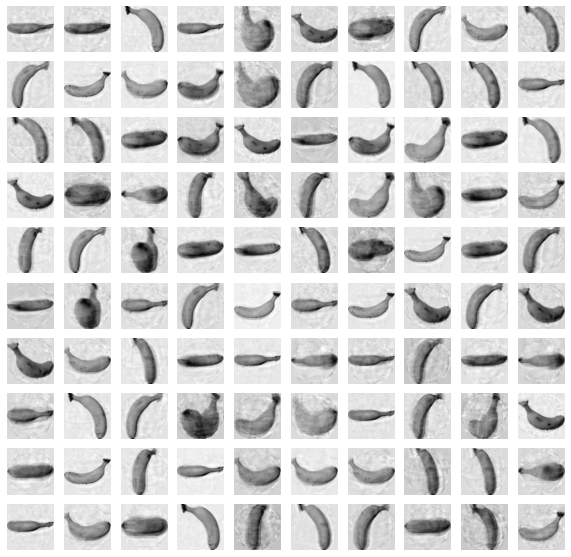

In [ ]:
fruits_reconstruct = fruits_inverse.reshape(-1,100,100)
for start in [0,100,200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print("\n")

In [ ]:
# 조금 흐리고 번지지만 잘 복원했다.

In [ ]:
# 주성분이 원본 데이터의 분산을 얼마나 잘 설명하는지를 기록한 값을 설명된 분산 이라고 함.
# explained_variance_ratio_
print(np.sum(pca.explained_variance_ratio_))
#print(pca.explained_variance_ratio_)

0.921581242615948
[0.42357017 0.09941755 0.06577863 0.04031172 0.03416875 0.03281329
 0.02573267 0.02054963 0.01372276 0.01342773 0.01152146 0.00944596
 0.00878232 0.00846697 0.00693049 0.00645188 0.00578896 0.00511203
 0.00486383 0.00480346 0.00447836 0.00437315 0.00408039 0.00389478
 0.00372447 0.00359279 0.00331451 0.00317769 0.00304264 0.00303695
 0.00288881 0.00275857 0.00264574 0.0025589  0.00252064 0.00247402
 0.00239021 0.00230871 0.00222172 0.00216462 0.00213171 0.00196397
 0.0019312  0.00190896 0.00184948 0.00182388 0.00172946 0.00169378
 0.00163016 0.00161075]


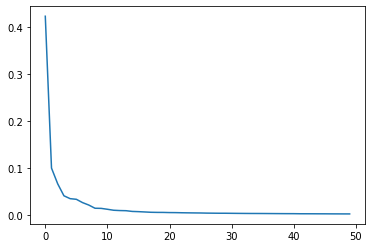

In [ ]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [ ]:
# 처음 10개의 주성분이 아주 잘 설명하고 있음


In [ ]:
# 원본 데이터와 PCA로 축소한 데이터를 지도 학습에 적용해 보고 어떤 차이가 있는지 알아보자.

# 1. LR
from sklearn.linear_model import LogisticRegression
lr =LogisticRegression()
target = np.array([0] * 100 + [1]* 100 + [2]*100)

# a. 원본 데이터
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
1.7670289039611817


In [ ]:
# b. pca 데이터
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.02813878059387207


In [ ]:
# 시간 단축 + 정확도 향상!
# n_components 에 수치가 아니라 원하는 "설명된 분산"의 비율을 정할 수 있음. 50%?
pca = PCA(n_components =0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [ ]:
print(pca.n_components_)

2


In [ ]:
# 단 2개로 원본 데이터의 분산의 50%를 표현가능
# 이 단 2 개의 주성분으로 원본 데이터를 변환해보자.
fruits_pca2 = pca.transform(fruits_2d)
print(fruits_pca2.shape)

(300, 2)


In [ ]:
# 점수는 ?
scores = cross_validate(lr, fruits_pca2, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.9933333333333334
0.07935957908630371


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
# 이번에는 이 주성분이 2개인 변환된 데이터를 이용해 k-평균 알고리즘으로 클러스터를 찾아보자
from sklearn.cluster import KMeans
km = KMeans(n_clusters= 3, random_state = 42)
km.fit(fruits_pca2)
print(np.unique(km.labels_, return_counts = True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


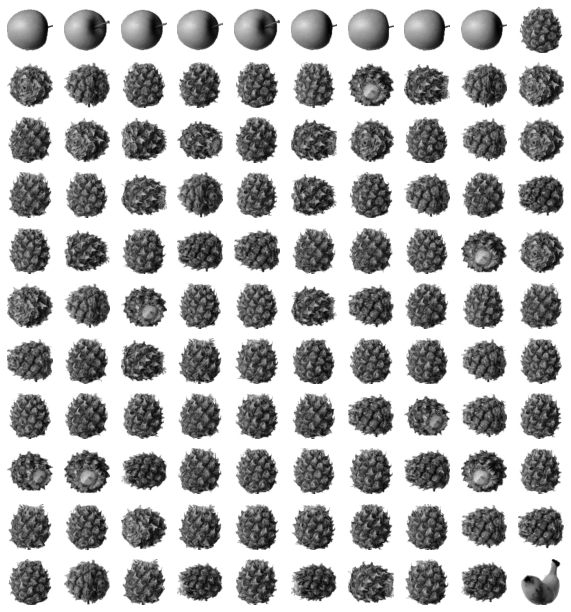

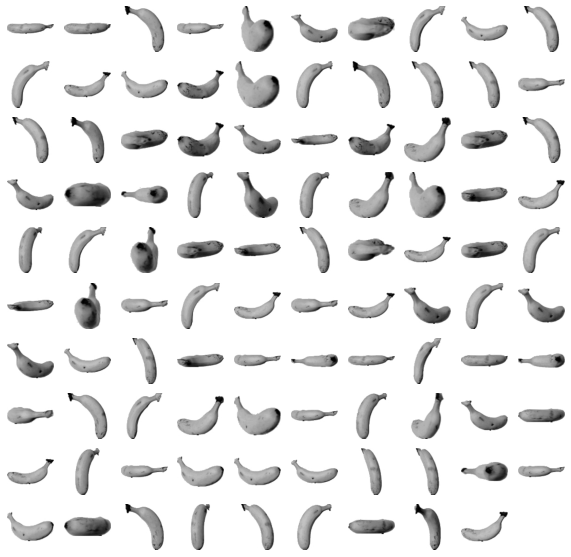

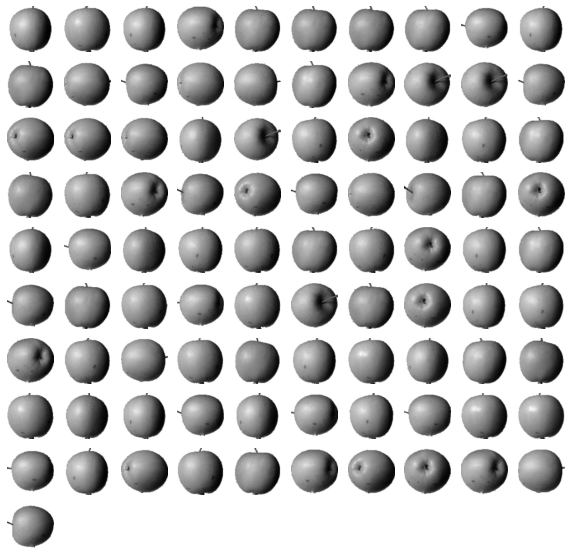

In [ ]:
# 앞에서 한거랑 거의 비슷한 결과네?
# 이미지 출력?
for label in range(0,3):
  draw_fruits(fruits[km.labels_ == label])
  print("\n")

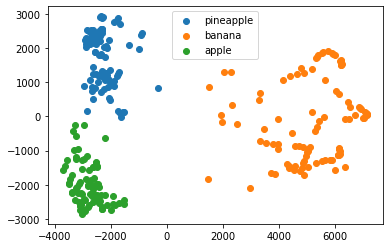

In [ ]:
# transform한 데이터로 클러스터를 찾고, 그 클러스터로 원본 데이터를 출력했음.
# 이제는 산점도를 구해보자

for label in range(0,3):
  data = fruits_pca2[km.labels_ == label]
  plt.scatter(data[:,0], data[:,1])
plt.legend(['pineapple', 'banana', 'apple'])
plt.show()

In [ ]:
print(data)

[[-2778.41779459 -1571.87380954]
 [-3078.27365136 -2739.27040962]
 [-2620.61072939 -1486.87055253]
 [-3113.71771062 -2530.02283015]
 [-2520.64705144 -2330.64791173]
 [-2711.38755162 -1857.35297386]
 [-2884.74283654 -1836.15286362]
 [-2310.99240338 -2660.46264957]
 [-1521.26665012 -2445.37438374]
 [-2486.91643797 -1475.55043726]
 [-2800.83912843 -2001.07115818]
 [-2810.56248913 -2034.36322556]
 [-2209.09841637 -2303.76592225]
 [-2917.38810303 -2438.42530884]
 [-2198.1718942   -636.80184589]
 [-2317.61818126 -2704.80151487]
 [-3289.84664277 -2436.3934378 ]
 [-3563.8760831  -1290.01167006]
 [-3708.64597097 -1575.33617706]
 [-2423.96625858 -2080.63343889]
 [-3169.13983546 -2238.74224157]
 [-3059.33441459 -2250.14899831]
 [-2745.8264558  -2276.96357422]
 [-3185.62291444  -958.24335683]
 [-2971.17053083  -250.76949659]
 [-2787.48896668 -2602.75971447]
 [-3498.88592281 -1937.32351269]
 [-3260.68825045  -265.30039087]
 [-2623.54750342 -2232.78452861]
 [-2307.99121345 -2708.07973757]
 [-3252.36